#Percobaan 1-NAIVE BAYES

In [4]:
!pip install Sastrawi

=== NAIVE BAYES ===
Akurasi: 0.7666666666666667

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.69      0.89      0.77        27
     Positif       0.88      0.67      0.76        33

    accuracy                           0.77        60
   macro avg       0.78      0.78      0.77        60
weighted avg       0.79      0.77      0.77        60


Confusion Matrix:
 [[24  3]
 [11 22]]


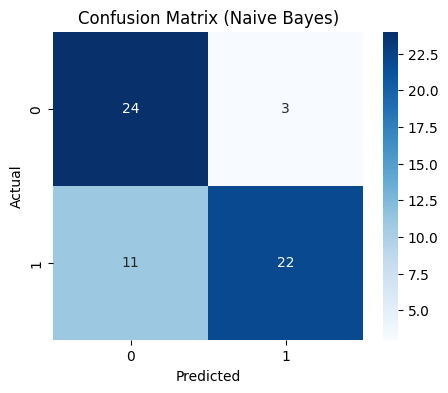

In [8]:
# ---- IMPORT LIBRARY ----
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

import seaborn as sns
import matplotlib.pyplot as plt

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# ---- PREPROCESSING ----
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stopwords = StopWordRemoverFactory().get_stop_words()

def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    words = [w for w in text.split() if w not in stopwords]
    text = stemmer.stem(" ".join(words))
    return text

# ---- LOAD DATA ----
df = pd.read_csv("data-manual.csv", sep=';', engine='python')
df["clean"] = df["Review"].apply(clean_text)
df = df.dropna(subset=['Label'])

# ---- TF-IDF ----
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean"])
y = df["Label"]

# ---- SPLIT ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- TRAIN ----
model = MultinomialNB()
model.fit(X_train, y_train)

# ---- PREDIKSI ----
y_pred = model.predict(X_test)

# ---- EVALUASI ----
print("=== NAIVE BAYES ===")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ---- VISUALISASI CONFUSION MATRIX ----
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Naive Bayes)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Percobaan 2 - SVM

=== SVM Linear ===
Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

     Negatif       0.70      0.85      0.77        27
     Positif       0.85      0.70      0.77        33

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.78      0.77      0.77        60



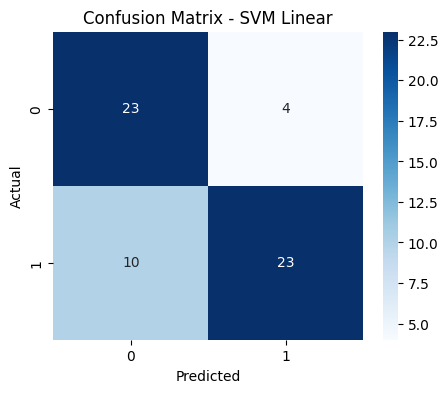

In [6]:
# --- IMPORT ---
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- PREPROCESSING ---
stemmer = StemmerFactory().create_stemmer()
stopwords = StopWordRemoverFactory().get_stop_words()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    words = [w for w in text.split() if w not in stopwords]
    return stemmer.stem(" ".join(words))

# --- LOAD DATA ---
df = pd.read_csv("data-manual.csv", sep=';', engine='python') # Fix: Specify delimiter and engine
df["clean"] = df["Review"].apply(clean_text) # Fix: 'review' column name to 'Review'

# Fix: Remove rows where 'Label' is NaN to prevent ValueError
df = df.dropna(subset=['Label'])

# --- TF-IDF ---
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df["clean"])
y = df["Label"] # Fix: 'label' column name to 'Label'

# --- SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- TRAIN ---
model = LinearSVC()
model.fit(X_train, y_train)

# --- PREDICT ---
y_pred = model.predict(X_test)

# --- EVALUATION ---
print("=== SVM Linear ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# --- CONFUSION MATRIX (VISUAL) ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM Linear")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#     Percobaan 3– LSTM

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 367ms/step - accuracy: 0.4896 - loss: 0.6932 - val_accuracy: 0.6458 - val_loss: 0.6914
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.6828 - loss: 0.6875 - val_accuracy: 0.6667 - val_loss: 0.6887
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.7402 - loss: 0.6734 - val_accuracy: 0.6458 - val_loss: 0.6819
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - accuracy: 0.7875 - loss: 0.6515 - val_accuracy: 0.6667 - val_loss: 0.6651
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 0.7538 - loss: 0.6165 - val_accuracy: 0.5625 - val_loss: 0.6522
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step
=== LSTM ===
Accuracy: 0.6833333333333333

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.79      0.41      0.54        27
     Positif       0.65      0.91      0.76        33

    accuracy                           0.68        60
   macro avg       0.72      0.66      0.65        60
weighte

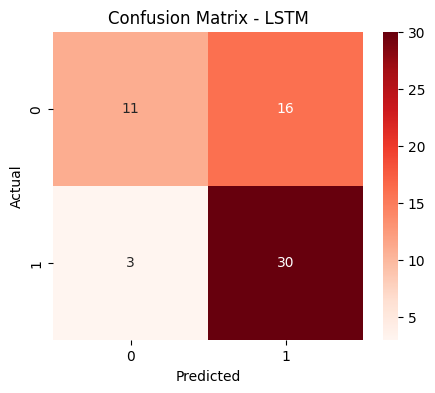

In [7]:


# --- IMPORT ---
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- PREPROCESSING ---
stemmer = StemmerFactory().create_stemmer()
stopwords = StopWordRemoverFactory().get_stop_words()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"[^a-zA-Z0-9\s]", " ", text)
    words = [w for w in text.split() if w not in stopwords]
    return stemmer.stem(" ".join(words))

# --- LOAD DATA ---
df = pd.read_csv("data-manual.csv", sep=';', engine='python')
df["clean"] = df["Review"].apply(clean_text)

# Fix: Remove rows where 'Label' is NaN to prevent ValueError
df = df.dropna(subset=['Label'])

# --- LABEL ENCODING (positif/negatif) ---
df["label_enc"] = df["Label"].map({"Positif": 1, "Negatif": 0})

# --- TOKENIZATION ---
MAX_WORDS = 5000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df["clean"])

X = tokenizer.texts_to_sequences(df["clean"])
X = pad_sequences(X, maxlen=MAX_LEN)

y = df["label_enc"].values

# --- SPLIT DATA ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- BUILD LSTM MODEL ---
model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation="relu"),
    Dropout(0.3),
    Dense(1, activation="sigmoid")
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

# --- TRAIN ---
history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# --- PREDICT ---
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# --- EVALUATION ---
print("=== LSTM ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))

# --- CONFUSION MATRIX (VISUAL) ---
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.title("Confusion Matrix - LSTM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Percobaan 4- TRANSFORMER

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 200)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 200, 128)  │  2,560,000 │ input_layer_3[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 200, 128)  │    131,968 │ embedding_3[0][0… │
│ (MultiHeadAttentio… │                   │            │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 200, 128)  │          0 │ multi_head_atten… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_4 (Add)         │ (None, 200, 128)  │          0 │ embedding_3[0][0… │
│                     │                   │            │ dropout_11[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 200, 128)  │        256 │ add_4[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 200, 128)  │     16,512 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 200, 128)  │     16,512 │ dense_8[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 200, 128)  │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_5 (Add)         │ (None, 200, 128)  │          0 │ layer_normalizat… │
│                     │                   │            │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 200, 128)  │        256 │ add_5[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 128)       │          0 │ global_average_p… │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 1)         │        129 │ dropout_13[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,725,633 (10.40 MB)

 Trainable params: 2,725,633 (10.40 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 503ms/step - accuracy: 0.4915 - loss: 1.3271 - val_accuracy: 0.4375 - val_loss: 0.8523
Epoch 2/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 428ms/step - accuracy: 0.5353 - loss: 0.7429 - val_accuracy: 0.5833 - val_loss: 0.6747
Epoch 3/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 679ms/step - accuracy: 0.5459 - loss: 0.7123 - val_accuracy: 0.4375 - val_loss: 0.7217
Epoch 4/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 425ms/step - accuracy: 0.5447 - loss: 0.6757 - val_accuracy: 0.5625 - val_loss: 0.6734
Epoch 5/5
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - accuracy: 0.5891 - loss: 0.6767 - val_accuracy: 0.6667 - val_loss: 0.6718
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step

===== HASIL MODEL TRANSFORMER =====
Akurasi: 0.5166666666666667

Classification Report:
               precision    recall  f1-score   support

     Negatif       0.53      0.30      0.38        30
     Positif       0.51      0.73      0.60        30

    accuracy                           0.52        60
   macro avg       0.52     

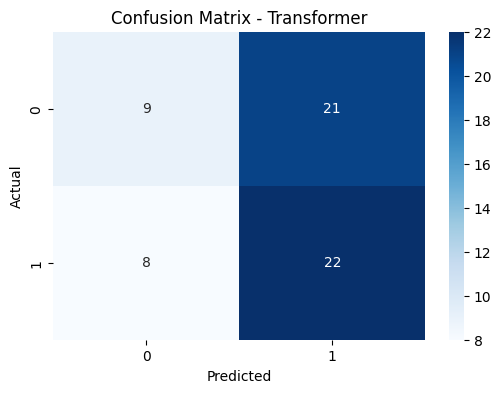

In [12]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Embedding, LayerNormalization, Dropout
from tensorflow.keras.layers import MultiHeadAttention, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import Sastrawi for preprocessing
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory


# 1. Load Dataset
df = pd.read_csv("data-manual.csv", sep=';', engine='python')
df = df.dropna(subset=['Label'])

# 2. Cleaning Text
stemmer = StemmerFactory().create_stemmer()
stopwords = StopWordRemoverFactory().get_stop_words()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Remove stopwords dan stem
    words = [w for w in text.split() if w not in stopwords]
    text = stemmer.stem(" ".join(words))
    return text

df['clean'] = df['Review'].apply(clean_text) # Corrected column name to 'Review'

# 3. Encode Label
df['label_enc'] = df['Label'].map({"Positif": 1, "Negatif": 0})

# 4. Tokenizing + Padding
MAX_WORDS = 20000
MAX_LEN = 200

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean'])

X = tokenizer.texts_to_sequences(df['clean'])
X = pad_sequences(X, maxlen=MAX_LEN)

y = df['label_enc'].values

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


# 6. Build Transformer Block
def transformer_block(inputs, head=4, dff=128, dropout=0.1):
    # Multi Head Attention
    attn_output = MultiHeadAttention(num_heads=head, key_dim=64)(inputs, inputs)
    attn_output = Dropout(dropout)(attn_output)
    out1 = LayerNormalization(epsilon=1e-6)(inputs + attn_output)

    # Feed Forward
    ffn = Dense(dff, activation="relu")(out1)
    ffn = Dense(inputs.shape[-1])(ffn)
    ffn = Dropout(dropout)(ffn)
    out2 = LayerNormalization(epsilon=1e-6)(out1 + ffn)

    return out2


# 7. Build Model
EMB_DIM = 128

inputs = Input(shape=(MAX_LEN,))
x = Embedding(MAX_WORDS, EMB_DIM)(inputs)

# Add Transformer Layer
x = transformer_block(x)

x = GlobalAveragePooling1D()(x)
x = Dropout(0.2)(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs, outputs)
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

# 8. Training Model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=5,
    batch_size=32
)


# 9. Evaluation
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("\n===== HASIL MODEL TRANSFORMER =====")
print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["Negatif", "Positif"]))


# 10. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Transformer")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
